# Getting data

In [ ]:
import os
import pandas as pd

## Tesseract OCR 
Optical Character Recognition

[Tesseract](https://github.com/tesseract-ocr/tesseract) is a text recognition (OCR) Engine. It is suitable due to its accuracy and open-source implementation.

Let's use a Python wrapper for Tesseract (***pytesseract***) to extract textual informationfrom Facebook political ads image.


Download Tesseract and its python wrapper


In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import pytesseract

In [ ]:
# Download some FB political ads using gdown
!gdown https://drive.google.com/uc?id=1aEpKI-EfdapGhTOor9eQ4LJx1YaLHiHq

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Downloading...
From: https://drive.google.com/uc?id=1aEpKI-EfdapGhTOor9eQ4LJx1YaLHiHq
To: /content/creatives.zip
100% 1.34M/1.34M [00:00<00:00, 81.8MB/s]


In [ ]:
#Unzip the dataset
!unzip creatives.zip

Archive:  creatives.zip
replace __MACOSX/._creatives? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pwd

'/content'

In [ ]:
path_creatives = './creatives/'

In [ ]:
base = []

for file in os.listdir(path_creatives):
    if file.endswith(".png"):
        print(file)
        filename = os.path.splitext(file)[0] #split the path name into a pair root and ext.
        text = pytesseract.image_to_string(Image.open(path_creatives+file))
        base.append((filename, text))

96901206.png
96792914.png
96887970.png
96856903.png
96761603.png
96836259.png
96893679.png
96936105.png
96817350.png
96849900.png
96807609.png
96794339.png


In [ ]:
base[0]

('96901206',
 "Bill Nelson for U.S. Senate\n\n \n\nURGENT: Military-style assault rifles, like the AR-15\nand AK-47, have no place on our streets. But NRA-\nbacked politicians, such as Rick Scott, refuse to\nrestrict these weapons of war. I'm fighting to get these\nassault rifles off of our streets, but | need to know\nwhere you stand: Do you support commonsense gun\nreforms?\n\n \n\nOne-Question Survey: Do you support\ncommonsense gun reforms?\n\n \n\n \n\x0c")

In [ ]:
df = pd.DataFrame(base, columns=["filename", "text"])

In [ ]:
df.head(5)

,filename,text
0,96901206,Bill Nelson for U.S. Senate\n\n \n\nURGENT: Mi...
1,96792914,Claire McCaskill\n\n \n\nJUST IN: President Tr...
2,96887970,"Kyrsten Sinema\nade 13 hrs\n\nCNN, Politico, t..."
3,96856903,ce Matt Rosendale\n\na\n\nJon Tester's priorit...
4,96761603,a Evan Jenkins\n\nMountaineers are always free...


In [ ]:
df.filename[0]

'96901206'

In [ ]:
#Now let's take a quick look at the performance of tesseract OCR results
df.text[0]

"Bill Nelson for U.S. Senate\n\n \n\nURGENT: Military-style assault rifles, like the AR-15\nand AK-47, have no place on our streets. But NRA-\nbacked politicians, such as Rick Scott, refuse to\nrestrict these weapons of war. I'm fighting to get these\nassault rifles off of our streets, but | need to know\nwhere you stand: Do you support commonsense gun\nreforms?\n\n \n\nOne-Question Survey: Do you support\ncommonsense gun reforms?\n\n \n\n \n\x0c"

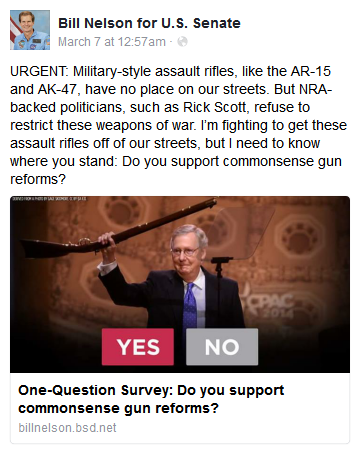

In [ ]:
# How accurate is the result?
Image.open(path_creatives+df.filename[0]+'.png')

In [ ]:
df.to_csv('./creative_text.csv', index=False)

 ## Image Scrapers
 
 How to download Bing images?

**Step1: Install google_images_download by ultralytics**

Reference: https://github.com/ultralytics/google-images-download

This is a Bing image-scraping software forked from https://github.com/hardikvasa/google-images-download, and updated by Ultralytics LLC, and is freely available for redistribution under the MIT license.

Note: The original hardikvasa/google-images-download uses [Selenium](https://www.selenium.dev/documentation/en/), a software that enables and supports the automation of web browsers, to scrape Google images. But it no longer works because Google has changed the way they present the image data since Feb 2020.


In [ ]:
# Cloning a git repository
# git clone targets an existing repository and create a clone
!git clone https://github.com/ultralytics/google-images-download

fatal: destination path 'google-images-download' already exists and is not an empty directory.


In [ ]:
os.listdir('./google-images-download')

['clean_images.py',
 '.gitignore',
 'bing_scraper.py',
 '.git',
 'README.md',
 'images',
 'LICENSE',
 'beautiful_scraper.py',
 'requirements.txt']

**Step2: Download Chromedriver & Selenium**

As we need to run a browser in the background, we install [Chromedriver](https://chromedriver.chromium.org/) so that our scraper can access the browser.












In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (104.0.5112.101-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [ ]:
#!pip3 install selenium
!pip3 install selenium==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import selenium
selenium.__version__

'4.2.0'

**Step3: Scaping Bing images**

In [ ]:
cd './google-images-download'

/content/google-images-download


In [ ]:
!python bing_scraper.py --search 'Bojack horseman' --limit 5 --download --chromedriver '/usr/bin/chromedriver'

Searching for https://www.bing.com/images/search?q=Bojack%20horseman
bing_scraper.py:195: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(chromedriver, options=options)
bing_scraper.py:206: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  element = browser.find_element_by_tag_name("body")
  browser.find_element_by_class_name('btn_seemore').click()  # bing images 'see more' button
1/5 https://image.tmdb.org/t/p/w1280/mxWsea65k3UNTzCv6WNl3uHVVOi.jpg 
2/5 http://img11.deviantart.net/e923/i/2015/239/f/c/bojack_horseman_by_aktheneroth-d97fnjf.jpg 
3/5 https://i.ytimg.com/vi/rnAviI5WW0E/maxresdefault.jpg 
4/5 URLError on an image...trying next one... Error: HTTP Error 400: BAD REQUEST
4/5 https://wallpapersflix.com/wp-content/uploads/2020/09/BoJack-Horseman-Mobile-Wallpaper.jpg 
5/5 https://66.media.tumblr.com/a8e3ddcbaf88d88ab1fce01c0e6d24dc/tumblr_o

In [ ]:
os.listdir('./images/Bojack_horseman')

['3.maxresdefault.jpg',
 '1.mxWsea65k3UNTzCv6WNl3uHVVOi.jpg',
 '2.bojack_horseman_by_aktheneroth-d97fnjf.jpg',
 '5.tumblr_od1fc8beo91rerpnbo1_500.png',
 '4.BoJack-Horseman-Mobile-Wallpaper.jpg']

In [ ]:
os.listdir('./images/Bojack_horseman')[0]

'3.maxresdefault.jpg'

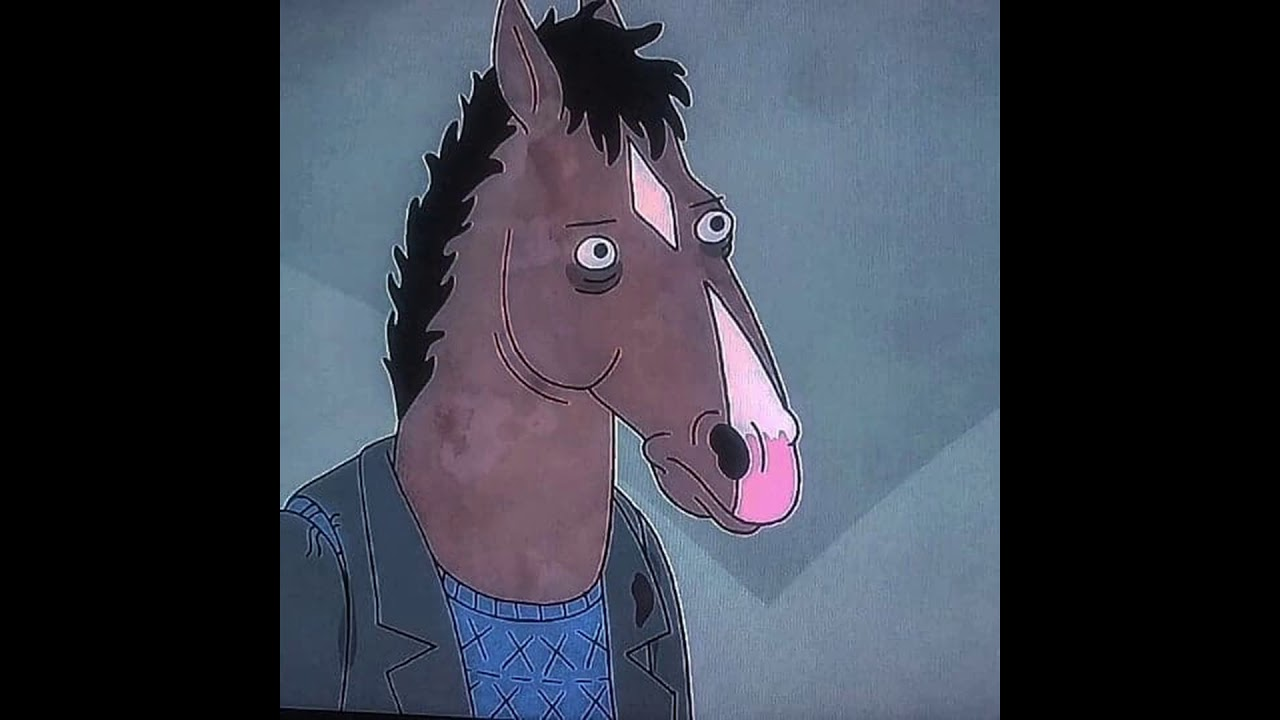

In [ ]:
Image.open('./images/Bojack_horseman/'+os.listdir('./images/Bojack_horseman')[0])

## wget

For us, wget has 2 primary purposes.


1. Downloading data directly into Colab
2. Scraping entire websites

Example: Government data on [class size at district level](https://catalog.data.gov/dataset/2010-2011-class-size-district-level-summary)

In [ ]:
pwd

'/content/google-images-download'

In [ ]:
cd ..

/content


In [ ]:
#wget into colab
!wget https://data.cityofnewyork.us/api/views/82rt-zc4y/rows.csv?accessType=DOWNLOAD -O class_size.csv

--2022-09-13 18:00:29--  https://data.cityofnewyork.us/api/views/82rt-zc4y/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘class_size.csv’

class_size.csv          [ <=>                ] 160.18K  --.-KB/s    in 0.06s   

2022-09-13 18:00:30 (2.69 MB/s) - ‘class_size.csv’ saved [164028]



In [ ]:
#Look at the files in the current directory -- it is there!
!ls

'Arrival Week 2020-3-7c5Okfb4w.en.vtt'
 class_size.csv
 creatives
 creatives.zip
 google-images-download
 gVybu_0ohQ8.mp4
 __MACOSX
 sample_data
 toscrape.com
 urls.txt
'Wesleyan University Homecoming_Family Weekend 2019-vzdtsJOkL6Q.f137.mp4.part'
'Wesleyan University Homecoming_Family Weekend 2019-vzdtsJOkL6Q.wav'


In [ ]:
#wget a website's html file
!wget https://catalog.data.gov/dataset/2010-2011-class-size-district-level-summary -O class_size

--2022-09-13 18:02:07--  https://catalog.data.gov/dataset/2010-2011-class-size-district-level-summary
Resolving catalog.data.gov (catalog.data.gov)... 52.84.18.9, 52.84.18.123, 52.84.18.102, ...
Connecting to catalog.data.gov (catalog.data.gov)|52.84.18.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57019 (56K) [text/html]
Saving to: ‘class_size’

class_size          100%[===================>]  55.68K  --.-KB/s    in 0.01s   

2022-09-13 18:02:07 (4.55 MB/s) - ‘class_size’ saved [57019/57019]



In [ ]:
#Print out the content of the downloaded file 
!cat class_size

In [ ]:
#Let's have a look at the wget manual
!man wget

In [ ]:
#recursively scrape the domain
!wget -r http://toscrape.com/

Useful options & arguments in wget:

**--recursive**: follow links

**--domains website.org**: don't follow links outside website.org

**--no-parent**: don't follow links outside the directory

**--page-requisites**: get all the elements that compose the page (images, CSS and so on).

**--adjust-extension**: Save files with .html on the end.
     
**--accept**: Specify comma-separated lists of file name suffixes or patterns to accept

**--reject**: Specify comma-separated lists of file name suffixes or patterns to reject

**--span-hosts**: Include necessary assets from offsite as well.

**--html-extension**: save files with the .html extension.

**--convert-links**: convert links so that they work locally, off-line.

**--restrict-file-names=windows**: modify filenames so that they will work in Windows as well.

**--no-clobber**: don't overwrite existing files

**--no-parent**: Don't follow links above the current directory level


## Web scraping with Python




The internet is full of data, just waiting for you to grab it. Web scraping allows us to do this in a time-efficient way. 

As an example, let's try to download the most recent transcripts of the [CNN 10](http://transcripts.cnn.com/TRANSCRIPTS/sn.html).

Html files start with `<!DOCTYPE html>`. The `title` element contains the text you see on your browser tab. The `link` and `script` elements reference the css stylesheet and javascript code that runs on the page. After that, the content of the page is defined.

The code for the page is structured like a tree. Everything is stored in a nested set of tags. For example, `<body>` tags contain the main body of the page. The `<p>` tag contains a paragraph, and so on. All html tags must be closed with a forward slash, like this `</p>`. Here is a [list](https://www.w3schools.com/tags/default.asp) of what content each tag is supposed to contain. Web developers usually stick by these rules, but unfortunately not always.



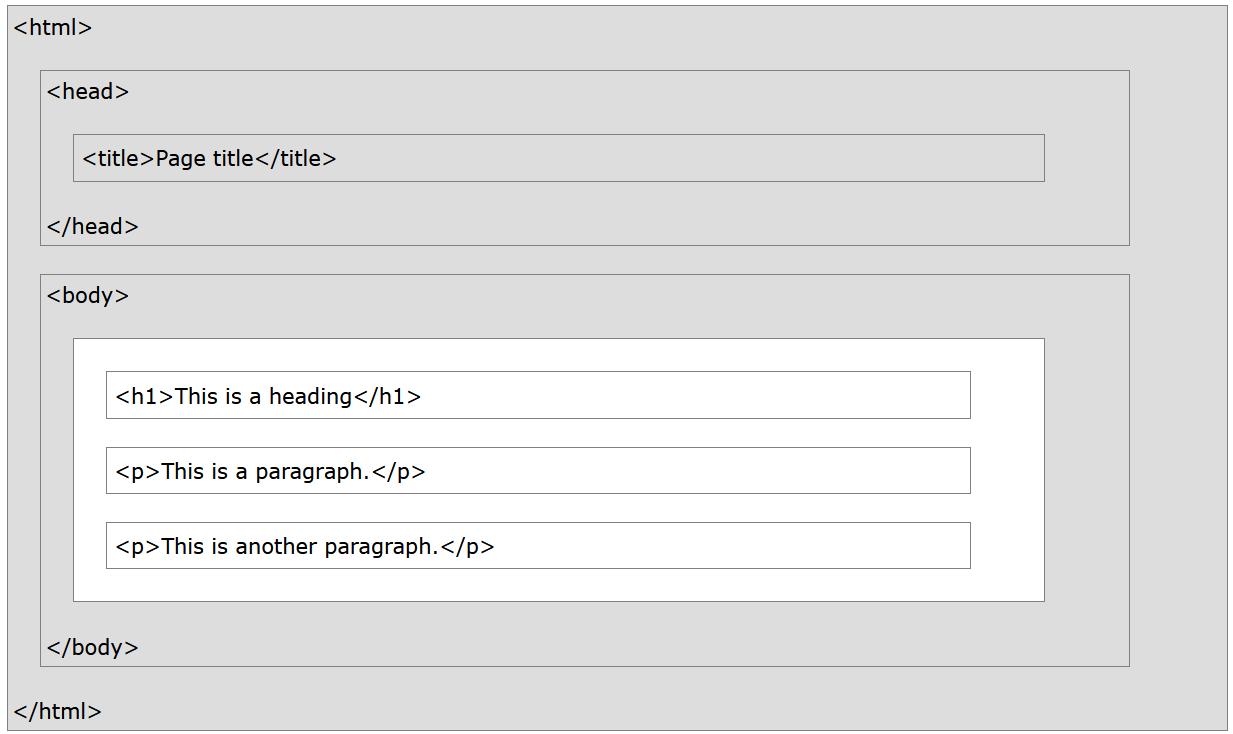

Define which parts of the html code we want to extract.

In [ ]:
#Load the required packages, all of which are already installed on Colab
import bs4 as bs # pulling data out of HTML and XML files.
import urllib.request # opening and reading URLs
import re # pattern matching

In [ ]:
#Download the website's html
source = urllib.request.urlopen("https://transcripts.cnn.com/show/sn").read()

In [ ]:
print(source)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="content-type" content="text/html; charset=iso-8859-1"/>\n<title>CNN.com - Transcripts</title>\n\n<link rel="stylesheet" href="/assets/story.css" type="text/css">\n\n<style type="text/css">\n<!--\n.cnnTransHeaders,\n.cnnTransDate\n{ font-family: verdana, arial, sans-serif; }\n\n.cnnTransCal,\n.cnnTransHead,\n.cnnTransStoryHead,\n.cnnTransSubHead\n{ font-family: arial, helvetica, sans-serif; }\n\n.cnnTransHeaders,\n.cnnTransDate,\n.cnnTransProv\n{ font-size: 10px; }\n\n.cnnTransSubHead\n{ font-size: 12px; }\n\n.cnnTransHead\n{ font-size: 14px; }\n\n.cnnTransStoryHead\n{ font-size: 16px; }\n\n.cnnTransHeaders,\n.cnnTransDate,\n.cnnTransHead,\n.cnnTransStoryHead,\n.cnnTransSubHead,\n.cnnTransProv\n{ font-weight: bold; }\n\n.cnnTransHeaders,\n.cnnTransSubHead,\n.cnnTransDate\n{ color: #000000; }\n\n.cnnTransHead,\n.cnnTransStoryHead\n{ color: #CC0000; }\n\n.cnnTransHeaders,\n.cnnTransCal\n{ padding: 6px; }\n\n.cnnTransProv\n{fon

In [ ]:
#Parse the html
#This makes it look nice and structured for us, and much easier to read for the program
soup = bs.BeautifulSoup(source)

In [ ]:
#Let's have a look
print(soup)

How do we get all the links?

In an HTML web page, every element can have an id attribute assigned. As the name already suggests, that id attribute makes the element uniquely identifiable on the page. You can begin to parse your page by selecting a specific element by its ID.

We can achieve this by using Chrome's 'view source page' or 'inspect' (or using 'view source page' or 'inspect' by using SelectorGadget).

In [ ]:
urls_css = ".cnnSectBulletItems a"

In [ ]:
urls = soup.select(urls_css)
print(urls)

[<a href="/show/sn/date/2022-09-13/segment/01">In Stunning Turnaround, Ukraine Recaptures Major Territory; A Look Back At A "Moonshot" Of A Speech; Interview With Inspiring NFL Player Younghoe Koo. Aired 4-4:10a ET</a>, <a href="/show/sn/date/2022-09-12/segment/01">Life and Legacy of Britain`s Queen Elizabeth II; Remembrances of the Lives Lost on September 11, 2001; Update on NASA`s Next Mission to the Moon</a>, <a href="/show/sn/date/2022-05-27/segment/01">Life Under COVID Restrictions In Beijing; America`s Aging Vehicles; A Milestone For Boeing`s Starliner. Aired 4-4:10a ET</a>, <a href="/show/sn/date/2022-05-26/segment/01">New Details Emerge From A Shooting In Texas; An Ongoing Drought In The U.S. West Drops Lake Levels To Historic Lows; A Penguin Conservation Center In New Zealand</a>, <a href="/show/sn/date/2022-05-25/segment/01">A Tragedy In Texas; Goods Shortages In Cuba And Sri Lanka; The U.S. Primary Season; A Mountain Climbing Record. Aired 4-4:10a ET</a>, <a href="/show/sn/d

In [ ]:
extracted_urls = [url["href"] for url in urls]
extracted_urls

In [ ]:
full_urls = ["http://transcripts.cnn.com/" + url_suffix for url_suffix in extracted_urls]
full_urls

Scraping can cause a lot of traffic for the websites you are visiting. If you scrape too much too quickly, you are effectively [DDoSing](https://en.wikipedia.org/wiki/Denial-of-service_attack) (Denial-of-service attack) them. So be careful.

Now that we've got all the links, we need to visit each, extract what we need and save it somewhere.

In [ ]:
#Let's do only the top 5 so we don't cause as much traffic
urls_to_scrape = full_urls[0:5]

In [ ]:
#Let's start with the first of these pages
#Get the html
source = urllib.request.urlopen(urls_to_scrape[0]).read()
#Parse it
soup = bs.BeautifulSoup(source)
#Select with the CSS selector
text_css = ".cnnBodyText"
text = soup.select(text_css)

In [ ]:
text

In [ ]:
str([i.text for i in text])

'[\'Aired September 13, 2022 - 04:00 \\xa0 ET\', \'THIS IS A RUSH TRANSCRIPT. THIS COPY MAY NOT BE IN ITS FINAL FORM AND MAY BE UPDATED.\', \'COY WIRE, CNN 10 ANCHOR:  What`s up, everyone? I am Coy, aka, Bald Dude, Mr. Clean, and I am humbled and grateful to be hanging with you this week   right here on CNN 10.  Lots to get to you this beautiful Tuesday, so, let`s go. Starting with an update on the ongoing conflict between Russia and Ukraine. Let`s take 10 to   see where things stand. Russia`s invasion of Ukraine began February 24th when Russian President Vladimir Putin announced a military operation in response to what he called   NATO expansion against Russia. The invasion has received international criticism and a lot of countries around the world won`t do business with   Russia anymore, and that has impacted the global economy. This week, Ukrainian troops have retaken more than 11,000 square miles of territory about the size of Rhode Island, and that`s more than Russian   troops ha

In [ ]:
#Now do this in a loop, for all 5 urls
texts = []

for i in urls_to_scrape:
  source = urllib.request.urlopen(i).read()
  soup = bs.BeautifulSoup(source)
  text_css = ".cnnBodyText"
  text = soup.select(text_css)
  texts.append(str([i.text for i in text]))

In [ ]:
#Results
print(len(texts))

5


Note: You may want to install [SelectorGadget](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb) as a browser extension. It makes CSS selector generation and discovery on complicated sites a breeze.

- CSS: CSS stands for Cascading Style Sheets. It describes how HTML elements are to be displayed on screen, paper, or in other media.
- CSS selector: A CSS selector selects the HTML element(s) you want to style.

## youtube-dl

For downloading videos from YouTube (or other video-sharing websites), the program [youtube-dl](https://github.com/ytdl-org/youtube-dl) can be used.

In 2020, there was a big fuss about youtube-dl since it can potentially be used to download copyrighted content. This caused it to briefly be unavailable for download. However, it has all been [cleared up](https://www.eff.org/deeplinks/2020/11/github-reinstates-youtube-dl-after-riaas-abuse-dmca) and we are free to use it!

In [ ]:
!pip install youtube-dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


youtube-dl is used through the shell. A single video can be downloaded as following:

In [ ]:
!youtube-dl --id https://www.youtube.com/watch?v=gVybu_0ohQ8
#This is often useful when downloading multiple videos programmatically
#The --id argument gives it the id from the URL rather than the video title
#Also, the titles often contain characters that need to be escaped when in a filename

[youtube] gVybu_0ohQ8: Downloading webpage
[download] gVybu_0ohQ8.mp4 has already been downloaded and merged


We can even watch the video from within Colab (note: this is not important, you don't need to understand this code).

In [ ]:
import io
import base64
from IPython.display import HTML
video_encoded = base64.b64encode(io.open('gVybu_0ohQ8.mp4', 'rb').read())
HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(640, 480, video_encoded.decode('ascii')))

Youtube-dl can download multiple videos, where the URLs are provided in a plaintext file. 

Here we write the following three URLs into a file and then use it as an input to youtube-dl (with the correct argument) to download them all.

In [ ]:
#Solution
urls = ['https://www.youtube.com/watch?v=vzdtsJOkL6Q', 'https://www.youtube.com/watch?v=4Jfy6dbhGk0', 'https://www.youtube.com/watch?v=E97RZ1a27Vo']
with open("urls.txt", "w") as writer:
  for i in urls:
    writer.write(i + "\n")

In [ ]:
!youtube-dl -a urls.txt

If you wanted to run the youtube-dl shell command from within Python, you can do the following:

In [ ]:

os.system("youtube-dl -a urls.txt")

2

In [ ]:
# !wget -i urls.txt

Youtube-dl can also be used to download only the audio (or rather, download everything and then convert it to audio), as well as the closed captions (automatically generated subtitles).

In [ ]:
#download only audio
!youtube-dl --extract-audio --audio-format wav https://www.youtube.com/watch?v=vzdtsJOkL6Q

In [ ]:
#download closed captions
!youtube-dl --write-auto-sub --skip-download https://youtu.be/3-7c5Okfb4w

In [ ]:
!cat 'Arrival Week 2020-3-7c5Okfb4w.en.vtt'
#This would still require some parsing, but it is usable!

## Useful resources

### GitHub

Awesome lists

List of gernal-purpose ML tutorials \\
https://github.com/ChristosChristofidis/awesome-deep-learning \\
https://github.com/ujjwalkarn/Machine-Learning-Tutorials \\
https://github.com/datascienceid/machine-learning-resources \\
https://github.com/sdukshis/awesome-ml \\
https://github.com/lab-ml/nn \\
Text \\
https://github.com/lyeoni/nlp-tutorial \\
https://github.com/datascienceid/nlp-resources \\
https://github.com/brianspiering/awesome-dl4nlp \\
https://github.com/sebastianruder/NLP-progress \\
Computer vision \\
https://github.com/jbhuang0604/awesome-computer-vision \\
https://github.com/kjw0612/awesome-deep-vision \\
Audio \\
https://github.com/ashishpatel26/Best-Audio-Classification-Resources-with-Deep-learning \\
https://github.com/drscotthawley/ml-audio-start \\
Colab-specific \\
https://github.com/firmai/awesome-google-colab \\
https://github.com/tugstugi/dl-colab-notebooks

List of programs \\
https://github.com/josephmisiti/awesome-machine-learning

Try out the tags, for example awesome-list to find more lists!

Machine learning papers and data on GitHub
https://github.com/google-research/bert

### Papers With Code

[Papers With Code](https://paperswithcode.com/) is a searchable database of machine learning research papers that also links to their replication code. This is tremendously useful for research.

### arXiv

Machine learning is one of the few academic fields in which research is not published in closed-access journals that university libraries have to pay for. Pretty much everything is just freely accessible on [arXiv](https://arxiv.org/list/cs.AI/recent). There is also [Arxiv Sanity Preserver](http://www.arxiv-sanity.com/), which provides better tools for searching for things you are interested in. You may also want to use [Arxiv Vanity](https://www.arxiv-vanity.com/) if you prefer html to pdfs.

### Kaggle

[Kaggle](https://www.kaggle.com/) is a website that holds machine learning competitions and also hosts a lot of data.

## Homework

***Please submit your notebook to the Moodle folder by 5pm on September 18***

### 1. Downloading Twitter images using TWINT API output

Twint is an advanced Twitter scraping tool written in Python that allows for scraping Tweets from Twitter profiles without using Twitter's API. For detailed instruction on how to use TWINT, see [here](https://github.com/twintproject/twint). Now let's use the output (**biden_images.csv**) from TWINT to download images in Biden's tweets. 

In [129]:
!gdown https://drive.google.com/uc?id=1XcHOzh2yrmZgsyLaob3qoZvHK9gb2UDE

Downloading...
From: https://drive.google.com/uc?id=1XcHOzh2yrmZgsyLaob3qoZvHK9gb2UDE
To: /content/google-images-download/biden_images.csv
100% 15.0k/15.0k [00:00<00:00, 15.1MB/s]


In [130]:
import os

import pandas as pd
!pip install twint
import twint
!pip install wget
import wget



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
dat = pd.read_csv("biden_images.csv")
dat.head(10)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.320000e+18,1.320000e+18,2020-10-21 23:26:00 EDT,10/21/20,23:26:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1.320000e+18,1.320000e+18,2020-10-20 14:59:00 EDT,10/20/20,14:59:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1.320000e+18,1.320000e+18,2020-10-20 12:10:00 EDT,10/20/20,12:10:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1.310000e+18,1.310000e+18,2020-10-07 19:52:00 EDT,10/7/20,19:52:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1.310000e+18,1.310000e+18,2020-10-03 16:37:00 EDT,10/3/20,16:37:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
5,1.310000e+18,1.310000e+18,2020-10-02 15:10:00 EDT,10/2/20,15:10:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
6,1.310000e+18,1.310000e+18,2020-09-17 19:50:00 EDT,9/17/20,19:50:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
7,1.310000e+18,1.310000e+18,2020-09-14 14:44:00 EDT,9/14/20,14:44:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
8,1.300000e+18,1.300000e+18,2020-08-28 15:27:00 EDT,8/28/20,15:27:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
9,1.300000e+18,1.300000e+18,2020-08-24 22:20:00 EDT,8/24/20,22:20:00,-400,939091,joebiden,Joe Biden,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


In [132]:
dat.thumbnail[:10]

0      https://pbs.twimg.com/media/Ek5xLFZXYAAt3vp.jpg
1      https://pbs.twimg.com/media/EkuhA3EXgAAsCeW.jpg
2      https://pbs.twimg.com/media/EkyNQJ9X0AMtdR2.jpg
3    https://pbs.twimg.com/tweet_video_thumb/EfQGEe...
4      https://pbs.twimg.com/media/Ejbn4yYWkAI6yUT.jpg
5      https://pbs.twimg.com/media/EjWHK6PX0AMNomm.jpg
6      https://pbs.twimg.com/media/EiJ5e5WWkAIB7rL.jpg
7      https://pbs.twimg.com/media/Eh5XJ-WXcAEEwH2.jpg
8      https://pbs.twimg.com/media/Egh-22QWAAAW0Ke.jpg
9      https://pbs.twimg.com/media/EgO24ssXYAAL-dk.jpg
Name: thumbnail, dtype: object

In [133]:
!cd './biden_images'
i = 0
while i<10:
  url = dat.thumbnail[i]
  filename = wget.download(url)
  print('Downloaded',filename)
  i+=1

/bin/bash: line 0: cd: ./biden_images: No such file or directory
Downloaded Ek5xLFZXYAAt3vp (2).jpg
Downloaded EkuhA3EXgAAsCeW (2).jpg
Downloaded EkyNQJ9X0AMtdR2 (2).jpg
Downloaded EfQGEeoXYAAZ_yn (2).jpg
Downloaded Ejbn4yYWkAI6yUT (2).jpg
Downloaded EjWHK6PX0AMNomm (2).jpg
Downloaded EiJ5e5WWkAIB7rL (2).jpg
Downloaded Eh5XJ-WXcAEEwH2 (2).jpg
Downloaded Egh-22QWAAAW0Ke (2).jpg
Downloaded EgO24ssXYAAL-dk (2).jpg


Download the first 10 images using the `thumbnail` column of the biden_images.csv.

### 2. Scraping the transcript abstracts of the first five shows of [Anderson Cooper 360 Degrees](http://transcripts.cnn.com/TRANSCRIPTS/acd.html)

Use the sleep function from the time module to ensure that your scraper takes a five-second break between each url it visits

In [134]:
from time import sleep





#Load the required packages, all of which are already installed on Colab
import bs4 as bs # pulling data out of HTML and XML files.
import urllib.request # opening and reading URLs
import re # pattern matching

#Download the website's html
source = urllib.request.urlopen("http://transcripts.cnn.com/TRANSCRIPTS/acd.html").read()



#Parse the html
#This makes it look nice and structured for us, and much easier to read for the program
soup = bs.BeautifulSoup(source)

#Let's have a look


urls_css = ".cnnSectBulletItems a"

urls = soup.select(urls_css)


extracted_urls = [url["href"] for url in urls]
extracted_urls

full_urls = ["http://transcripts.cnn.com/" + url_suffix for url_suffix in extracted_urls]
full_urls


#urls_to_scrape = full_urls[0:5]


i = 0
urls_to_scrape = []
while i<5:
  urls_to_scrape.append(full_urls[i])
  sleep(5)
  i+=1

'''
source = urllib.request.urlopen(urls_to_scrape[0]).read()

soup = bs.BeautifulSoup(source)

text_css = ".cnnBodyText"
text = soup.select(text_css)

text

str([i.text for i in text])
'''
texts = []

for item in urls_to_scrape:
  source = urllib.request.urlopen(item).read()
  soup = bs.BeautifulSoup(source)
  text_css = ".cnnBodyText"
  text = soup.select(text_css)
  texts.append(str([item.text for item in text]))
  sleep(5)

#Results
print((texts))

['[\'Aired September 16, 2022 - 20:00 \\xa0 ET\', \'THIS IS A RUSH TRANSCRIPT. THIS COPY MAY NOT BE IN ITS FINAL FORM AND MAY BE UPDATED.\', \'ERIN BURNETT, CNN HOST: The White House says there has been movement with Russia, but not a breakthrough.   Griner has been held since February on drug charges, Whelan for three years on alleged espionage, which he denies. The White House offered to release a notorious Russian arms dealer, Viktor Bout in exchange for Griner and Whelan, but there has been so far no response from Putin to that offer.   Thanks for joining us. Anderson starts now.   [20:00:25]   ANDERSON COOPER, CNN HOST:  Good evening.   The very best this country can be was on display today as 50 migrants flown to Martha\\\'s Vineyard cheered a State government promising to shelter them and provide emergency services. Today, they were sent to a military base on Cape Cod after locals had donated manpower and tens of thousands of dollars to help and also greeting them.   CNN had spo